In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

# Generate 100 data points
hours_studied = np.linspace(0.5, 10, 100)  # Hours studied from 0.5 to 10
grades = (hours_studied * 10) + np.random.normal(0, 5, 100)  # Grades, with some randomness

# Clipping grades to be between 0 and 100
grades = np.clip(grades, 0, 100)



In [294]:
class LinearRegression:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.m = 0
        self.b = 0
        self.lr = 0.01
        self.data_length = len(x)

    def mse_loss_gradient(self):
        dm = -2/self.data_length * np.sum(self.x * (self.y - (self.m*self.x + self.b)))
        db = -2/self.data_length * np.sum(self.y - (self.m*self.x + self.b))
        print(f"dm: {dm}, db: {db}")
        self.m -= self.lr * dm
        self.b -= self.lr * db
        print(f"m: {self.m}, b: {self.b}")

    def train(self, epochs):
        for _ in range(epochs):
            print(f"Function: {self.m}x + {self.b}")
            self.mse_loss_gradient()


In [295]:
model = LinearRegression(hours_studied, grades)

In [296]:
model.train(4)

Function: 0x + 0
dm: -703.6668042798633, db: -105.41767800799364
m: 7.036668042798633, b: 1.0541767800799364
Function: 7.036668042798633x + 1.0541767800799364
dm: -196.7201603154056, db: -29.424309998448113
m: 9.003869645952689, b: 1.3484198800644176
Function: 9.003869645952689x + 1.3484198800644176
dm: -55.00085101939485, db: -8.18020696536157
m: 9.553878156146638, b: 1.4302219497180333
Function: 9.553878156146638x + 1.4302219497180333
dm: -15.38253327378337, db: -2.241513469017872
m: 9.707703488884471, b: 1.452637084408212


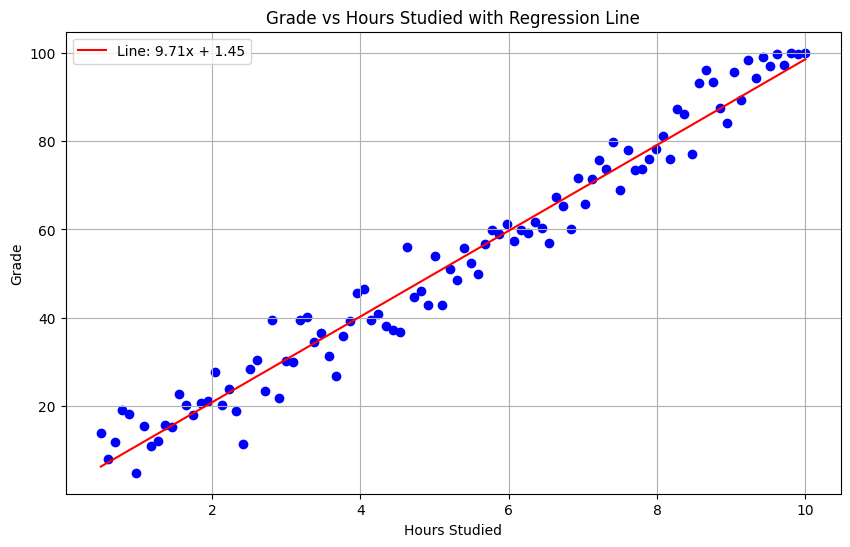

In [297]:
# Create a DataFrame and display the first few rows
data = pd.DataFrame({'Hours_Studied': hours_studied, 'Grade': grades})
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Hours_Studied'], data['Grade'], color='blue')

# Calculate the y-values for the line
line_y = model.m * data['Hours_Studied'] + model.b

# Plot the line
plt.plot(data['Hours_Studied'], line_y, color='red', label=f'Line: {model.m:.2f}x + {model.b:.2f}')

# Add plot details
plt.title('Grade vs Hours Studied with Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Grade')
plt.grid(True)
plt.legend()
plt.show()
